In [2]:
from glob import glob
import pandas as pd
import numpy as np
%matplotlib inline

/home/eduardo/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


/home/eduardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Number of species')

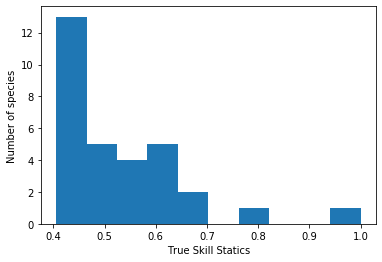

In [12]:
specie = []
for i in glob('/home/eduardo/projetos/conservacao_de_plantas_mudancas_climaticas/data/models/response/*/*'):
    data=pd.read_csv(i)
    
    data['specie']='{0}_{1}'.format(i.split('/')[-1].split('_')[-2],i.split('/')[-1].split('_')[-1].replace('.csv',''))
    data['algoritmo']= i.split('/')[-2]
    data['TSS'] = data.sensitivity + data.specificity -1
    if data.TSS.values >= 0.4:
        
        specie.append(data)
data=pd.concat(specie) 
data=data.drop(['Unnamed: 0'],axis=1)
data=data.set_index(['specie'])
data=data.groupby(['specie']).max()
ax=data.TSS.plot(kind='hist')
ax.set_xlabel('True Skill Statics')
ax.set_ylabel('Number of species')
